In [1]:
import pandas as pd
import os
import ast
import numpy as np

In [2]:
df=pd.read_csv("Popularity_Spotify2 (1).csv")
df2=pd.read_csv("abdelrhman&nour.csv")
df2["Album Release Date"]=df["Album Release Date"]

In [3]:
df

,Song,Album Release Date,Hot100 Ranking Year,Decade,Season
0,I Need You,2001-01-30,2001,new millennium,Winter
1,Sweet Lady,1998-08-31,1999,Nighnties,Summer
2,You Take My Breath Away - Mono Version,1979-04-14,1979,Seventies,Spring
3,If I Give My Heart to You (with The Mellomen),1945-02-08,1954,Fourties,Winter
4,Don't Forget About Us (As Made Famous By Maria...,2011-08-16,2011,new millennium,Summer
...,...,...,...,...,...
6186,Strike It Up,1990-04-09,1991,Nighnties,Spring
6187,Ridin',2005-01-01,2006,new millennium,Winter
6188,Where'd You Go (feat. Holly Brook & Jonah Matr...,2005-11-21,2006,new millennium,Autumn
6189,Love Song,2007-07-03,2008,new millennium,Summer


In [4]:
df2

,Song,Artist(s) Genres,Genres count,Weight,total weight of genres,Album Release Date
0,I Need You,"{' country', 'country dawn', ' contemporary co...",4,478,1912,2001-01-30
1,Sweet Lady,"{' contemporary r&b', ' urban contemporary', '...",4,1718,6872,1998-08-31
2,You Take My Breath Away - Mono Version,{'bubblegum pop'},1,47,47,1979-04-14
3,If I Give My Heart to You (with The Mellomen),"{' movie tunes', ' easy listening', ' vocal ja...",5,493,2465,1945-02-08
4,Don't Forget About Us (As Made Famous By Maria...,{'karaoke'},1,177,177,2011-08-16
...,...,...,...,...,...,...
6186,Strike It Up,"{' eurodance', 'italo house', ' diva house', '...",4,76,304,1990-04-09
6187,Ridin',"{' ohio hip hop', 'gangster rap', ' dirty sout...",4,597,2388,2005-01-01
6188,Where'd You Go (feat. Holly Brook & Jonah Matr...,"{' lilith', 'rap rock'}",2,56,112,2005-11-21
6189,Love Song,"{' post-teen pop', ' neo mellow', ' lilith', '...",7,372,2604,2007-07-03


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Song                    6191 non-null   object
 1   Artist(s) Genres        5795 non-null   object
 2   Genres count            6191 non-null   int64 
 3   Weight                  6191 non-null   int64 
 4   total weight of genres  6191 non-null   int64 
 5   Album Release Date      6191 non-null   object
dtypes: int64(3), object(3)
memory usage: 290.3+ KB


In [11]:
DfExpanded=pd.DataFrame(df2)
df2["Album Release Date"] = pd.to_datetime(df2["Album Release Date"])
DfExpanded["Song"]=df2["Song"]
DfExpanded["Day"]=df2["Album Release Date"].dt.day
DfExpanded["Month"]=df2["Album Release Date"].dt.month
DfExpanded["Year"]=df2["Album Release Date"].dt.year
DfExpanded=DfExpanded.drop(["Artist(s) Genres","Album Release Date"],axis=1)

In [12]:
DfExpanded

,Song,Genres count,Weight,total weight of genres,Day,Month,Year
0,I Need You,4,478,1912,30,1,2001
1,Sweet Lady,4,1718,6872,31,8,1998
2,You Take My Breath Away - Mono Version,1,47,47,14,4,1979
3,If I Give My Heart to You (with The Mellomen),5,493,2465,8,2,1945
4,Don't Forget About Us (As Made Famous By Maria...,1,177,177,16,8,2011
...,...,...,...,...,...,...,...
6186,Strike It Up,4,76,304,9,4,1990
6187,Ridin',4,597,2388,1,1,2005
6188,Where'd You Go (feat. Holly Brook & Jonah Matr...,2,56,112,21,11,2005
6189,Love Song,7,372,2604,3,7,2007


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
x=np.array(DfExpanded.drop(["Song"],axis=1))

In [23]:
kmeans.fit(scaled_features)

KMeans(n_clusters=20)

In [24]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_


In [25]:
DfExpanded["clusters"]=labels

<AxesSubplot: >

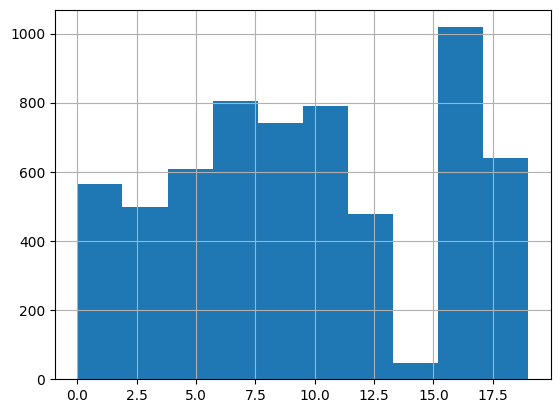

In [26]:
DfExpanded["clusters"].hist()

In [21]:
DfExpanded.drop(["Genres count","Weight","total weight of genres","Day","Month","Year"],axis=1).to_csv("clusterData")